In [31]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
df=pd.read_csv('../input/software-defect-prediction/jm1.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [ ]:
df.sample(10)

In [34]:

df['uniq_Op'] = pd.to_numeric(df['uniq_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['uniq_Opnd'] = pd.to_numeric(df['uniq_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Op'] = pd.to_numeric(df['total_Op'], errors='coerce') ## convert to number, make NaNs from ?s 
df['total_Opnd'] = pd.to_numeric(df['total_Opnd'], errors='coerce') ## convert to number, make NaNs from ?s 
df['branchCount'] = pd.to_numeric(df['branchCount'], errors='coerce') ## convert to number, make NaNs from ?s 
df['defects'] = df['defects'].astype(int)

df = df.dropna()
df = df.reset_index(drop=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

In [ ]:
df.sample(10)

In [36]:
from sklearn import model_selection

# Split-out validation dataset
array = df.values
X = array[:,0:21]
Y = array[:,21]

# Get Training and Validation sets
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)


In [37]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_validation=sc.fit_transform(X_validation)

In [38]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,1


In [39]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
%time classifier.fit(X_train,Y_train)

#predicting
y_pred=classifier.predict(X_validation)

CPU times: user 3.22 s, sys: 99.4 ms, total: 3.32 s
Wall time: 3.33 s


In [40]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(Y_train,classifier.predict(X_train))
test_acc = accuracy_score(Y_validation,y_pred)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.822, Test: 0.830


In [41]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, classification_report
#print("1. Accuracy: {}".format(accuracy_score(Y_validation, y_pred)))
#print("2. Confusion Matrix:n{}".format(pd.crosstab(Y_validation, y_pred, rownames=['True'], colnames=['Predicted'])))
#f1_score(Y_validation, y_pred, average='weighted')
print('Accuracy Score : ' + str(accuracy_score(Y_validation,y_pred)))
print('Precision Score : ' + str(precision_score(Y_validation,y_pred)))
print('Recall Score : ' + str(recall_score(Y_validation,y_pred)))
print('F1 Score : ' + str(f1_score(Y_validation,y_pred)))

print(classification_report(Y_validation, y_pred))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(Y_validation,y_pred)))

Accuracy Score : 0.8299632352941176
Precision Score : 0.5789473684210527
Recall Score : 0.14285714285714285
F1 Score : 0.22916666666666666
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      1791
         1.0       0.58      0.14      0.23       385

    accuracy                           0.83      2176
   macro avg       0.71      0.56      0.57      2176
weighted avg       0.79      0.83      0.78      2176

Confusion Matrix : 
[[1751   40]
 [ 330   55]]


ROC AUC=0.560


ROC AUC=0.560


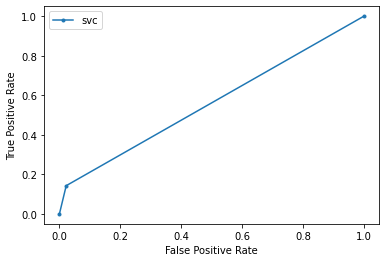

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_validation, y_pred)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(Y_validation, y_pred)
# plot the roc curve for the model
plt.plot(fpr, tpr,  marker='.', label='svc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import hinge_loss
pred_decision = classifier.decision_function(X_validation)
hloss = hinge_loss(Y_validation,pred_decision)
print(hloss)

Differential Evolution implementation

In [48]:
from scipy.optimize import differential_evolution

svc_alpha_lim = (0.1,10.0)
svc_gamma_lim = (0.1,10.0)
boundaries = [svc_alpha_lim,svc_gamma_lim] #[svc_alpha_lim] + [svc_gamma_lim]

#c_vector = [1e-2,1e-1,1,1e1,0.009,0.01,0.09,5,10,25,100]
#gamma_vector = [0.1,0.01,1e-5,1e-4,1e-3]
#hyperparams = [c_vector,gamma_vector]

def svc_function(hyperparams):
    alpha_value,gamma_value = hyperparams
    svc_temp=SVC(kernel='rbf',random_state=0,C=alpha_value,gamma = gamma_value)
    svc_temp.fit(X_train,Y_train)
    y_pred_temp=svc_temp.predict(X_validation)
    
    error = 1-accuracy_score(Y_validation, y_pred_temp)
    return error
   


%time solver = differential_evolution(svc_function,boundaries,strategy='best1bin', workers=-1)
# Calculate best hyperparameters and resulting rmse
best_hyperparams = solver.x
best_error = solver.fun
# Print final results
print("Converged hyperparameters: alpha= %.6f, gamma= %.6f" %(best_hyperparams[0],best_hyperparams[1]))    
print("Minimum error: %.6f" %(best_error))

CPU times: user 13.1 s, sys: 491 ms, total: 13.6 s
Wall time: 6min 32s
Converged hyperparameters: alpha= 0.461769, gamma= 1.040252
Minimum error: 0.176471


In [49]:
# when c ranegs from 1 to 2 and gamma ranges from 1 to 2, C=1.052822,gamma = 1.742512
# on 1st run using range from 0.1 to 10 , C=1.462757,gamma = 9.334614
svc_after_de=SVC(kernel='rbf',random_state=0,C=0.461769 ,gamma = 1.040252)
svc_after_de.fit(X_train,Y_train)
y_pred_after_de=svc_after_de.predict(X_validation)

previous one when range from 1 to 2 for both c and gamma
Accuracy Score : 0.8230698529411765
Precision Score : 0.5
Recall Score : 0.04155844155844156
F1 Score : 0.07673860911270983
Confusion Matrix : 
[[1775   16]
[ 369   16]]

In [51]:
print('Accuracy Score : ' + str(accuracy_score(Y_validation,y_pred_after_de)))
print('Precision Score : ' + str(precision_score(Y_validation,y_pred_after_de)))
print('Recall Score : ' + str(recall_score(Y_validation,y_pred_after_de)))
print('F1 Score : ' + str(f1_score(Y_validation,y_pred_after_de)))

print(classification_report(Y_validation, y_pred_after_de))
print('Confusion Matrix : \n' + str(confusion_matrix(Y_validation,y_pred_after_de)))


Accuracy Score : 0.8235294117647058
Precision Score : 0.5454545454545454
Recall Score : 0.015584415584415584
F1 Score : 0.0303030303030303
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      1791
         1.0       0.55      0.02      0.03       385

    accuracy                           0.82      2176
   macro avg       0.69      0.51      0.47      2176
weighted avg       0.78      0.82      0.75      2176

Confusion Matrix : 
[[1786    5]
 [ 379    6]]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_validation, y_pred_after_de)
# summarize scores
print('ROC AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = roc_curve(Y_validation, y_pred_after_de)
# plot the roc curve for the model
plt.plot(fpr, tpr,  marker='.', label='svc')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()